## Install the necessary python libraries

In [81]:
!pip install networkx pandas numpy matplotlib community python-louvain

import networkx as nx
import numpy as np
import pandas as pd
from community import community_louvain
import matplotlib.pyplot as plt

# Social Network
## Load sample social network

In [82]:
df = pd.read_csv("data/edge_list.csv")

graph = nx.from_pandas_edgelist(df,source="A",target="B")

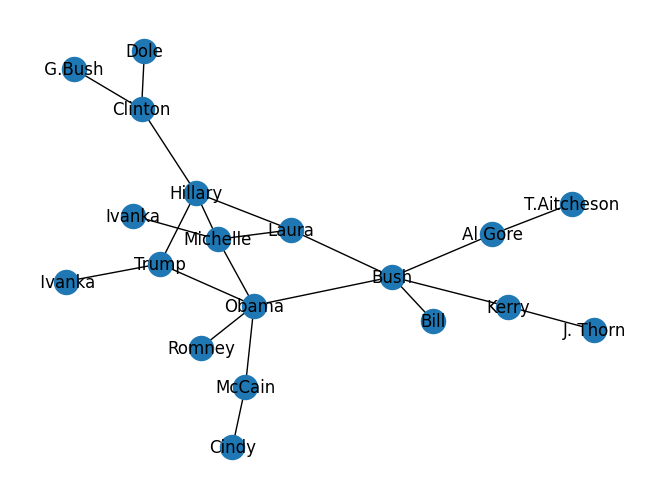

In [83]:
nx.draw(graph, with_labels = True)

## Checking degree

In [84]:
# Degree of all nodes
print(nx.degree(graph))
# Degree of a node 
print(f"+ Obama: {nx.degree(graph,'Obama')}")

[('Clinton', 3), ('Hillary', 4), ('Bush', 5), ('Laura', 3), ('Obama', 5), ('Michelle', 4), ('Trump', 3), (' Ivanka', 1), (' G.Bush ', 1), ('Dole', 1), ('Al Gore', 2), ('Kerry', 2), ('McCain', 2), ('Romney', 1), ('Bill', 1), ('Ivanka', 1), ('J. Thorn', 1), ('T.Aitcheson', 1), ('Cindy', 1)]
+ Obama: 5


## Influential rate

In [85]:
# Most Influential People
degree_centrality = nx.degree_centrality(graph)
for person in sorted(degree_centrality, key=degree_centrality.get, reverse=True):
    print(f"{person}: {degree_centrality[person]}")

Bush: 0.2777777777777778
Obama: 0.2777777777777778
Hillary: 0.2222222222222222
Michelle: 0.2222222222222222
Clinton: 0.16666666666666666
Laura: 0.16666666666666666
Trump: 0.16666666666666666
Al Gore: 0.1111111111111111
Kerry: 0.1111111111111111
McCain: 0.1111111111111111
 Ivanka: 0.05555555555555555
 G.Bush : 0.05555555555555555
Dole: 0.05555555555555555
Romney: 0.05555555555555555
Bill: 0.05555555555555555
Ivanka: 0.05555555555555555
J. Thorn: 0.05555555555555555
T.Aitcheson: 0.05555555555555555
Cindy: 0.05555555555555555


In [86]:
# Most important people based on eigenvector centrality
eigen_centrality = nx.eigenvector_centrality(graph)
for person in sorted(eigen_centrality, key=eigen_centrality.get, reverse=True):
    print(f"{person}: {eigen_centrality[person]}")

Obama: 0.4266565483896092
Michelle: 0.41352797669954305
Hillary: 0.3844215944154331
Bush: 0.36961806064013986
Laura: 0.36852963127385646
Trump: 0.2843345252706339
Clinton: 0.151529287137245
McCain: 0.14957130173861366
Romney: 0.13466969692277045
Ivanka: 0.13052504916898053
Al Gore: 0.12957724264199433
Kerry: 0.12957724264199433
Bill: 0.11666706333937447
 Ivanka: 0.08974661863249653
 G.Bush : 0.04782770964575168
Dole: 0.04782770964575168
Cindy: 0.047210688306275804
J. Thorn: 0.04090043619100647
T.Aitcheson: 0.04090043619100647


In [87]:
# Most important people based on betweenness centrality
betweenness_centrality = nx.betweenness_centrality(graph)
for person in sorted(betweenness_centrality, key=betweenness_centrality.get, reverse=True):
    print(f"{person}: {betweenness_centrality[person]}")

Bush: 0.4901960784313726
Obama: 0.43790849673202614
Hillary: 0.32026143790849676
Clinton: 0.21568627450980393
Laura: 0.19607843137254902
Michelle: 0.17647058823529413
Trump: 0.16339869281045752
Al Gore: 0.11111111111111112
Kerry: 0.11111111111111112
McCain: 0.11111111111111112
 Ivanka: 0.0
 G.Bush : 0.0
Dole: 0.0
Romney: 0.0
Bill: 0.0
Ivanka: 0.0
J. Thorn: 0.0
T.Aitcheson: 0.0
Cindy: 0.0


## Density of the graph

In [88]:
nx.density(graph)

0.12280701754385964

## Transitivity of the graph

In [89]:
nx.transitivity(graph)

0.06818181818181818

In [90]:
# Team 1
team_1 = nx.bfs_tree(graph,"Obama")

# Team 2
team_2 = nx.bfs_tree(graph,"Clinton")

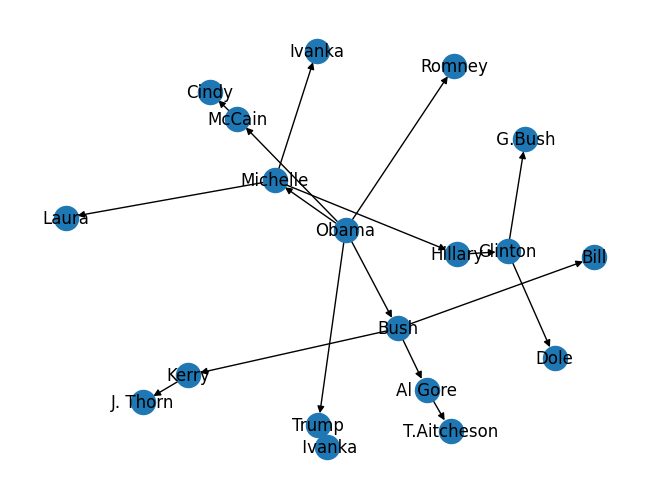

In [91]:
nx.draw(team_1, with_labels = True)

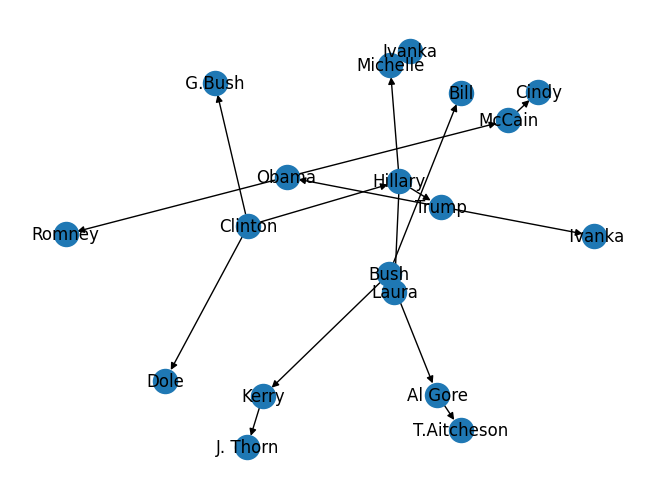

In [92]:
nx.draw(team_2, with_labels = True)

## Clustering coefficient for nodes.

In [93]:
nx.clustering(graph)

{'Clinton': 0,
 'Hillary': 0.16666666666666666,
 'Bush': 0,
 'Laura': 0.3333333333333333,
 'Obama': 0,
 'Michelle': 0.16666666666666666,
 'Trump': 0,
 ' Ivanka': 0,
 ' G.Bush ': 0,
 'Dole': 0,
 'Al Gore': 0,
 'Kerry': 0,
 'McCain': 0,
 'Romney': 0,
 'Bill': 0,
 'Ivanka': 0,
 'J. Thorn': 0,
 'T.Aitcheson': 0,
 'Cindy': 0}

## Community

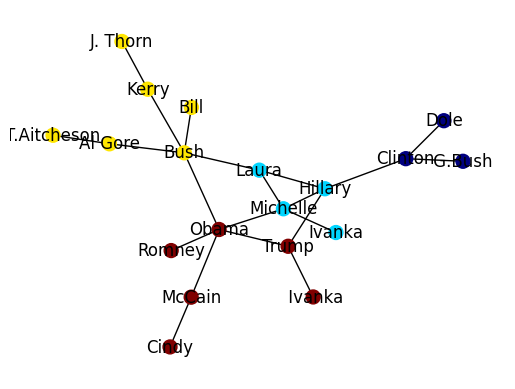

In [95]:
parts = community_louvain.best_partition(graph)
values = [parts.get(node) for node in graph.nodes()]
pos = nx.spring_layout(graph)
plt.axis("off")
nx.draw_networkx(graph, with_labels=True, pos = pos, cmap = plt.get_cmap("jet"), node_color = values, node_size = 100)